# steamÊ∏∏ÊàèÂàÜÊûê

## 1 Êï∞ÊçÆÁà¨Âèñ

In [ ]:
#Áà¨ÂèñÊ∏∏ÊàèÂàóË°®ÂèäÁΩëÂùÄ
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd

headers = {'User-Agent': 'Mozilla/5.0'}
#ÊõøÊç¢‰Ω†Ëá™Â∑±ÁöÑheaders
n =26
#n‰ª£Ë°®Áà¨ÂèñÂà∞Â§öÂ∞ëÈ°µ
path = '11.xlsx'
#‰øÆÊîπ‰Ω†ÁöÑ‰øùÂ≠ò‰ΩçÁΩÆ

def getgamelist(n):
    linklist=[]
    IDlist = []
    for pagenum in range(0,n):
        r = requests.get('https://store.steampowered.com/search/?ignore_preferences=1&category1=998&os=win&filter=globaltopsellers&page=%d'%pagenum,headers=headers)
        soup = BeautifulSoup(r.text, 'lxml')
        soups= soup.find_all(href=re.compile(r"https://store.steampowered.com/app/"),class_="search_result_row ds_collapse_flag")
        for i in soups:
            i = i.attrs
            i = i['href']
            link = re.search('https://store.steampowered.com/app/(\d*?)/',i).group()
            ID = re.search('https://store.steampowered.com/app/(\d*?)/(.*?)/', i).group(1)
            linklist.append(link)
            IDlist.append(ID)
        print('Â∑≤ÂÆåÊàê'+str(pagenum)+'È°µ,ÁõÆÂâçÂÖ±'+str(len(linklist)))
    return linklist,IDlist

def getdf(n):#ËΩ¨df
    linklist,IDlist = getgamelist(n)
    df = pd.DataFrame(list(zip(linklist,IDlist)),
               columns =['Link', 'ID'])
    return df
if __name__ == "__main__":
    df = getdf(n)#n‰ª£Ë°®Áà¨ÂèñÂà∞Â§öÂ∞ëÈ°µ
    df.to_excel(path)#ÂÇ®Â≠ò

In [ ]:
#ÊåâÊ∏∏ÊàèÂàóË°®Áà¨ÂèñÂêÑÊ∏∏Êàè‰ø°ÊÅØ
def gamename(soup):   #Ê∏∏ÊàèÂêçÂ≠ó
    try:
        a = soup.find(class_="apphub_AppName")
        k = str(a.string)
    except:
        a = soup.find(class_="apphub_AppName")
        k = str(a.text)
    return k

def gameprice(soup):#‰ª∑Ê†º
    try:
        a = soup.findAll(class_="discount_original_price")
        for i in a:
            if re.search('¬•|free|ÂÖçË¥π', str(i),re.IGNORECASE):
                a = i
        k = str(a.string).replace('	', '').replace('\n', '').replace('\r', '').replace(' ', '')
    except:
        a = soup.findAll(class_="game_purchase_price price")
        for i in a:
            if re.search('¬•|free|ÂÖçË¥π', str(i),re.IGNORECASE):
                a = i
        k = str(a.string).replace('	', '').replace('\n', '').replace('\r', '').replace(' ', '')
    return k

def taglist(soup):#Ê†áÁ≠æÂàóË°®
    list1=[]
    a = soup.find_all(class_="app_tag")
    for i in a:
        k = str(i.string).replace('	', '').replace('\n', '').replace('\r', '')
        if k == '+':
            pass
        else:
            list1.append(k)
    list1 = str('\n'.join(list1))
    return list1

def description(soup):  #Ê∏∏ÊàèÊèèËø∞
    a = soup.find(class_="game_description_snippet")
    k = str(a.string).replace('	', '').replace('\n', '').replace('\r', '')
    return k

def reviewsummary(soup):   #ÊÄª‰ΩìËØÑ‰ª∑
    a = soup.find(class_="summary column")
    try:
        k = str(a.span.string)
    except:
        k=str(a.text)
    return k

def getdate(soup):   #ÂèëË°åÊó•Êúü
    a = soup.find(class_="date")
    k = str(a.string)
    return k

def userreviewsrate(soup):#ÊÄª‰ΩìÊï∞ÈáèÂ•ΩËØÑÁéá
    a = soup.find(class_="user_reviews_summary_row")
    k = str((a.attrs)['data-tooltip-html'])
    return k

def developer(soup):   #ÂºÄÂèëÂïÜ
    a = soup.find(id="developers_list")
    k = str(a.a.string)
    return k

def getreviews(ID):#Ëé∑ÂèñËØÑËÆ∫
    r1 = requests.get(
        'https://store.steampowered.com/appreviews/%s?cursor=*&day_range=30&start_date=-1&end_date=-1&date_range_type=all&filter=summary&language=schinese&l=schinese&review_type=positive&purchase_type=all&playtime_filter_min=0&playtime_filter_max=0&filter_offtopic_activity=1'%str(ID),headers=headers,timeout=10)
    soup = BeautifulSoup(r1.json()['html'], 'lxml')
    a = soup.findAll(class_="content")
    list1 = []
    for i in a:
        list1.append(i.text.replace('	', '').replace('\n', '').replace('\r', '').replace(' ', ','))
    k=str('\n'.join(list1))
    return k

def getdetail(x):
    tag, des, reviews, date, rate, dev, review,name,price = ' ', ' ', ' ', ' ', ' ', ' ', ' ',' ',' '
    global count
    try:
        r = requests.get(x['Link'], headers=headers,timeout=10)
    except:
        print('ÊúçÂä°Âô®Êó†ÂìçÂ∫î1')
        try:
            r = requests.get(x['Link'], headers=headers,timeout=10)
        except:
            print('ÊúçÂä°Âô®Êó†ÂìçÂ∫î2')
            try:
                r = requests.get(x['Link'], headers=headers,timeout=10)
            except:
                print('ÊúçÂä°Âô®Êó†ÂìçÂ∫î3')

    try:
        soup = BeautifulSoup(r.text, 'lxml')
        name = gamename(soup)
        tag = taglist(soup)
        des = description(soup)
        reviews = reviewsummary(soup)
        date = getdate(soup)
        rate = userreviewsrate(soup)
        dev = developer(soup)
        review = getreviews(str(x['ID']))
        price = gameprice(soup)
        print('Â∑≤ÂÆåÊàê: '+name+str(x['ID'])+'Á¨¨%d‰∏™'%count)
    except:
        print('Êú™ÂÆåÊàê:  '+str(x['ID'])+'Á¨¨%d‰∏™'%count)
        price = 'error'

    count += 1
    return name,price,tag,des,reviews,date,rate,dev,review


if __name__ == "__main__":
    df1 = pd.read_excel('1.xlsx')
    count = 1
    df1['ËØ¶ÁªÜ'] = df1.apply(lambda x: getdetail(x), axis=1)
    df1['ÂêçÂ≠ó'] = df1.apply(lambda x: x['ËØ¶ÁªÜ'][0], axis=1)
    df1['‰ª∑Ê†º'] = df1.apply(lambda x: x['ËØ¶ÁªÜ'][1], axis=1)
    df1['Ê†áÁ≠æ'] = df1.apply(lambda x: x['ËØ¶ÁªÜ'][2], axis=1)
    df1['ÊèèËø∞'] = df1.apply(lambda x: x['ËØ¶ÁªÜ'][3], axis=1)
    df1['ËøëÊúüËØÑ‰ª∑'] = df1.apply(lambda x: x['ËØ¶ÁªÜ'][4], axis=1)
    df1['ÂèëË°åÊó•Êúü'] = df1.apply(lambda x: x['ËØ¶ÁªÜ'][5], axis=1)
    df1['ËøëÊúüÊï∞ÈáèÂ•ΩËØÑÁéá'] = df1.apply(lambda x: x['ËØ¶ÁªÜ'][6], axis=1)
    df1['ÂºÄÂèëÂïÜ'] = df1.apply(lambda x: x['ËØ¶ÁªÜ'][7], axis=1)
    df1['ËØÑËÆ∫'] = df1.apply(lambda x: x['ËØ¶ÁªÜ'][8], axis=1)
    
    df1.to_excel('positive.xlsx')
    print('Â∑≤ÂÆåÊàêÂÖ®ÈÉ®')

## 2 Êï∞ÊçÆÊ∏ÖÊ¥ó‰∏éÂ§ÑÁêÜ

In [ ]:
#Ê∏ÖÁêÜerrorË°åÂπ∂Êï¥ÁêÜ‰ª∑Ê†ºÁöÑÊ†ºÂºè
import pandas as pd
df1 = pd.read_excel('positive.xlsx')
df2=df1[-df1.‰ª∑Ê†º.isin(['error'])]
df3=df2[-df2.ËøëÊúüÊï∞ÈáèÂ•ΩËØÑÁéá.isin(['No user reviews'])]
df3['‰ª∑Ê†º']=df3['‰ª∑Ê†º'].str.replace('FreeToPlay','$0')
df3['‰ª∑Ê†º']=df3['‰ª∑Ê†º'].str.replace('reetoPlay','0')
df3['‰ª∑Ê†º']=df3['‰ª∑Ê†º'].str.replace('ree','0')
df3['‰ª∑Ê†º']=df3['‰ª∑Ê†º'].str.replace('layforF0!','0')
jiage=df3['‰ª∑Ê†º']
pricelist=[]
#ÂéªÊéâÔø•
for jg in jiage:
    jg1=jg[1:]
    pricelist.append(jg1)
#df3['ËØÑËÆ∫']

In [ ]:
#ÂéªÊéâ‰ª∑Ê†ºÂçÉÂàÜ‰ΩçÂπ∂ËΩ¨Êç¢intÊ†ºÂºè
import locale
locale.setlocale( locale.LC_ALL, 'en_US.UTF-8' ) 
pricelist1=[]
for i in range(len(pricelist)):
    a=locale.atoi(pricelist[i])
    pricelist1.append(a)
pricelist1=[int(x) for x in pricelist1]

In [ ]:
#Âà†Èô§Ê∏∏ÊàèËØÑËÆ∫ÂàóÔºàÂáèÂ∞ëÂÜÖÂ≠òÂç†Áî®Ôºâ
df4=df3.reset_index(drop=True)
df5=df4.drop(columns=['ËØÑËÆ∫'])
#df5.to_excel('negative.xls')üòò
#ËΩ¨Êç¢Êó•ÊúüÊ†ºÂºè+ÊèêÂèñÂπ¥Êï∞ÊçÆ
df5['ÂèëË°åÊó•Êúü'] = pd.to_datetime(df5['ÂèëË°åÊó•Êúü'] )
df5['Âπ¥'] = df5['ÂèëË°åÊó•Êúü'].dt.year
#ÊèêÂèñËøëÊúüÊï∞ÈáèÂ•ΩËØÑÁéáÈáåÁöÑËØÑ‰ª∑‰∫∫Êï∞ÂíåÂ•ΩËØÑÁéá
num_raw=[]
rate=[]
for i in range(len(df5['ËøëÊúüÊï∞ÈáèÂ•ΩËØÑÁéá'])):
    rating=df5['ËøëÊúüÊï∞ÈáèÂ•ΩËØÑÁéá'][i]
    ratinglist=rating.split()
    rate_per=ratinglist[0]
    month_num=ratinglist[3]
    num_raw.append(month_num)
    rate.append(rate_per)
locale.setlocale( locale.LC_ALL, 'en_US.UTF-8' ) 
num=[]
for i in range(len(num_raw)):
    a=locale.atoi(num_raw[i])
    num.append(a)
num_final=[int(x) for x in num]
df5['ËøëÊúüËØÑ‰ª∑‰∫∫Êï∞']=num
df5['ËøëÊúüÂ•ΩËØÑÁéá']=rate
df5.to_excel('negative.xls')

In [ ]:
#ÂçïÁã¨ÊèêÂèñÂ•ΩËØÑÂíåÂ∑ÆËØÑ
cm=df4['ËØÑËÆ∫']
cmlist=[]
for i in range(0,len(cm)):
    b=cm[i]
    cmlist.append(b)
ng_cm=pd.DataFrame(cmlist)
#ng_cm.to_excel('pt_cm.xls')
#ng_cm.to_excel('ng_cm.xls')
cmlist

In [ ]:
#ÊèêÂèñÊ∏∏ÊàèÊ†áÁ≠æÔºåÊ†πÊçÆÊ†áÁ≠æÂá∫Áé∞Ê¨°Êï∞ÁªüËÆ°Â•ΩËØÑÁéá
import pandas as pd
df=pd.read_excel('basic_info(1).xlsx')
a=df['Ê†áÁ≠æ']
tg_cm_list=[]
for i in range(len(a)):
    b=a[i]
    c=b.split('\n')
    haopinglv=df['ËøëÊúüÂ•ΩËØÑÁéá']
    d=haopinglv[i]
    list=[d for x in range(len(c))]
    zipped=zip(c,list)#dic=dict(map(lambda x,y:[x,y],c,list))
    df_zipped=pd.DataFrame(zipped)
    df_zipped.columns=['tag','rate']
    tg_cm_list.append(df_zipped)
tg_cm_list[560]
#data=pd.DataFrame(zipped)
#ÁîüÊàêÊ†áÁ≠æÂíåÂ•ΩËØÑÁéáÁöÑdf
final=tg_cm_list[0]
for x in range(len(tg_cm_list)):
    final=pd.merge(final,tg_cm_list[x],on='tag',how='outer')
final

In [ ]:
#ÊèêÂèñÊ∏∏ÊàèÊ†áÁ≠æÔºåÊ†πÊçÆÊ†áÁ≠æÂá∫Áé∞Ê¨°Êï∞ÁªüËÆ°Â•ΩËØÑ‰∫∫Êï∞
a=df['Ê†áÁ≠æ']
tg_num_list=[]
for i in range(len(a)):
    b=a[i]
    c=b.split('\n')
    df['Â•ΩËØÑ‰∫∫Êï∞']=df['ËøëÊúüÂ•ΩËØÑÁéá']*df['ËøëÊúüËØÑ‰ª∑‰∫∫Êï∞']
    haopingrenshu=df['Â•ΩËØÑ‰∫∫Êï∞']
    d=haopingrenshu[i]
    list=[d for x in range(len(c))]
    zipped=zip(c,list)#dic=dict(map(lambda x,y:[x,y],c,list))
    df_zipped=pd.DataFrame(zipped)
    df_zipped.columns=['tag','num']
    tg_num_list.append(df_zipped)
tg_num_list[1]
#ÁîüÊàêÊ†áÁ≠æÂíåÂ•ΩËØÑ‰∫∫Êï∞ÁöÑdfÂπ∂ÂÇ®Â≠ò
from functools import reduce
df_final = reduce(lambda left, right: pd.merge(left, right, on='tag',how='outer'), tg_num_list)
df_final.to_excel('Ê†áÁ≠æÂ•ΩËØÑ‰∫∫Êï∞.xlsx')

In [ ]:
#Êü•ÁúãtagÊòØÂê¶ÈáçÂ§ç
print(final.index.is_unique)

In [ ]:
#ÁªüËÆ°ÂêÑÊ†áÁ≠æÂ•ΩËØÑÁéáÁöÑÂπ≥ÂùáÂÄº
final['ave']=final.mean(1)
tg_cm=final[['tag','ave']]
tg_cm.to_excel('Ê†áÁ≠æÂπ≥ÂùáÂ•ΩËØÑÁéá.xls')

In [ ]:
#Ê†πÊçÆÊ†áÁ≠æÊèêÂèñËØÑ‰ª∑Âπ∂Ê±áÊÄª
import pandas as pd
df=pd.read_excel('positive.xlsx')
a=df['Ê†áÁ≠æ']
tg_cm_list=[]
for i in range(len(a)):
    b=a[i]
    c=b.split('\n')
    haopinglv=df['ËØÑËÆ∫']
    d=haopinglv[i]
    list=[d for x in range(len(c))]
    zipped=zip(c,list)#dic=dict(map(lambda x,y:[x,y],c,list))
    df_zipped=pd.DataFrame(zipped)
    df_zipped.columns=['tag','rate']
    tg_cm_list.append(df_zipped)
#tg_cm_list[560]
#data=pd.DataFrame(zipped)
tg=final['tag']
tg_list=[]
for i in range(0,371):
    tg_single=tg[i]
    tg_list.append(tg_single)
len(tg_list)

#Ê±áÊÄªÂ•ΩËØÑ
tg_cm_list1=[]
for tag in tg_list:
    tg_cm_list2=[]
    for x in range(len(a)):
        if tag in str(a[x]):
            tg_cm_list2.append(haopinglv[x])
    tg_cm_list1.append(tg_cm_list2)    

#Â∞ÜtagÂèò‰∏∫Ë°åÁ¥¢Âºï
df1=pd.DataFrame(tg_cm_list1)
df1.index=tg_list
df1


df1.to_excel('tag_cm.xlsx')

## 3 Êï∞ÊçÆÂàÜÊûê

In [2]:
import pandas as pd
import numpy as np

In [3]:
#Êï∞ÊçÆÂèØËßÜÂåñ„ÄÅÂ∏ÇÂú∫ÂàÜÊûêÂíåÁõ∏ÂÖ≥ÂàÜÊûê
data1 = pd.read_excel('basic_info.xlsx')
data = data1.iloc[:,4:]
data.info()
data.describe()
data['ËøëÊúüÂ•ΩËØÑÁéá'] = data['ËøëÊúüÂ•ΩËØÑÁéá']*100
data['ÈîÄÂîÆÈ¢ù'] = data['‰ª∑Ê†º']*data['ËøëÊúüËØÑ‰ª∑‰∫∫Êï∞']
data.sort_values('ÈîÄÂîÆÈ¢ù',ascending = False)
table1 = data.groupby(['ÂºÄÂèëÂïÜ'])['ËøëÊúüÂ•ΩËØÑÁéá'].mean().reset_index()
table2 = table1.sort_values('ËøëÊúüÂ•ΩËØÑÁéá',ascending=False)
table2
table3 = data.groupby(['ÂºÄÂèëÂïÜ'])['ÂºÄÂèëÂïÜ'].count().reset_index(name = 'ÂºÄÂèëÊ∏∏Êàè‰∏™Êï∞')
table4 = table3.sort_values('ÂºÄÂèëÊ∏∏Êàè‰∏™Êï∞',ascending = False)
table4.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562 entries, 0 to 561
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Link     562 non-null    object        
 1   ID       562 non-null    int64         
 2   ËØ¶ÁªÜ       562 non-null    object        
 3   ÂêçÂ≠ó       562 non-null    object        
 4   ‰ª∑Ê†º       562 non-null    int64         
 5   Ê†áÁ≠æ       562 non-null    object        
 6   ÊèèËø∞       562 non-null    object        
 7   ËøëÊúüËØÑ‰ª∑     562 non-null    object        
 8   ÂèëË°åÊó•Êúü     562 non-null    datetime64[ns]
 9   ËøëÊúüÊï∞ÈáèÂ•ΩËØÑÁéá  562 non-null    object        
 10  ÂºÄÂèëÂïÜ      562 non-null    object        
 11  Âπ¥        562 non-null    int64         
 12  ËøëÊúüËØÑ‰ª∑‰∫∫Êï∞   562 non-null    int64         
 13  ËøëÊúüÂ•ΩËØÑÁéá    562 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(8)
memory usage: 61.6+ KB


ÂºÄÂèëÂïÜ  ÂºÄÂèëÊ∏∏Êàè‰∏™Êï∞
380                        Valve      13
366  USERJOY Technology Co.,Ltd.       7
18              Arc System Works       7
371             Ubisoft Montreal       7
62             CREATIVE ASSEMBLY       7
322     Spike Chunsoft Co., Ltd.       7
180   KOEI TECMO GAMES CO., LTD.       7
85        CyberConnect2 Co. Ltd.       6
255   Paradox Development Studio       5
58              CAPCOM Co., Ltd.       5

In [4]:
table5 = data.groupby(['ÂºÄÂèëÂïÜ'])['ÈîÄÂîÆÈ¢ù'].sum().reset_index()
table6 = table5.sort_values('ÈîÄÂîÆÈ¢ù',ascending=False)
table6.head(20)

ÂºÄÂèëÂïÜ       ÈîÄÂîÆÈ¢ù
135        Gaijin Entertainment  23661840
58             CAPCOM Co., Ltd.  21402685
169                  Innersloth  19568392
371            Ubisoft Montreal  14807486
211                       Maxis  13764560
32   Behaviour Interactive Inc.  10244094
55                       Bungie   9778910
300                SCS Software   9544332
176                       Jagex   6103768
336             Studio Wildcard   5467594
102           Eagle Dynamics SA   5416684
187               Kinetic Games   4813505
294              Rockstar Games   4187904
255  Paradox Development Studio   3393306
122               Firaxis Games   3113210
380                       Valve   2817049
59               CD PROJEKT RED   2462955
46           Blue Mammoth Games   2371296
189          Klei Entertainment   2233889
253            PUBG Corporation   2211528

In [5]:
table7 = pd.merge(table1,table3)
table8 = pd.merge(table6,table7,how = 'left').reset_index()
table8.head()
total_sales = table8['ÈîÄÂîÆÈ¢ù'].sum()
table8 ['Â∏ÇÂú∫‰ªΩÈ¢ù'] = table8['ÈîÄÂîÆÈ¢ù']/total_sales*100
table9 = table8.iloc[0:10,:]
market_share_of_top10 = table9['Â∏ÇÂú∫‰ªΩÈ¢ù'].sum()
print('ÂâçÂçÅÂºÄÂèëÂïÜÁöÑÂ∏ÇÂú∫ÂàÜÈ¢ù‰∏∫: %.2f%% '%market_share_of_top10 )

ÂâçÂçÅÂºÄÂèëÂïÜÁöÑÂ∏ÇÂú∫ÂàÜÈ¢ù‰∏∫: 56.90% 


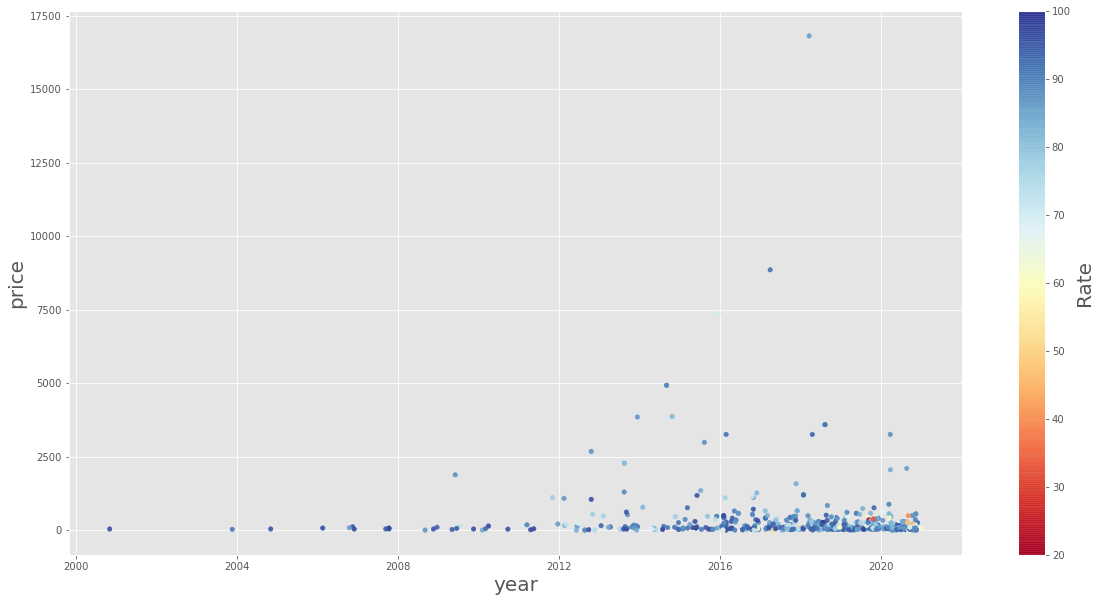

In [6]:
import matplotlib.pyplot as plt 
%matplotlib inline
Y = data['‰ª∑Ê†º'] 
X = data['ÂèëË°åÊó•Êúü']
plt.style.use('ggplot')
plt.figure(figsize=(20, 10))
plt.scatter(X,Y,s=20, c=data['ËøëÊúüÂ•ΩËØÑÁéá'], alpha=.9,cmap=plt.get_cmap('RdYlBu'))
plt.colorbar().set_label('Rate',fontsize=20)
plt.xlabel('year',fontsize=20)
plt.ylabel('price',fontsize=20)
plt.show()

In [7]:
data.loc[data['‰ª∑Ê†º']>5000]

Link      ID  \
200  https://store.steampowered.com/app/223750/  223750   
366  https://store.steampowered.com/app/269950/  269950   
418  https://store.steampowered.com/app/339600/  339600   

                                                    ËØ¶ÁªÜ  \
200  ('DCS World Steam Edition', '¬•16,822', 'Simula...   
366  ('X-Plane 11', '¬•8,859', 'Simulation\nFlight\n...   
418  ('VEGA Conflict', '¬•7,392', 'Free to Play\nSpa...   

                          ÂêçÂ≠ó     ‰ª∑Ê†º  \
200  DCS World Steam Edition  16822   
366               X-Plane 11   8859   
418            VEGA Conflict   7392   

                                                    Ê†áÁ≠æ  \
200  Simulation\nFlight\nFree to Play\nMultiplayer\...   
366  Simulation\nFlight\nRealistic\nOpen World\nMul...   
418  Free to Play\nSpace\nStrategy\nMassively Multi...   

                                                    ÊèèËø∞             ËøëÊúüËØÑ‰ª∑  \
200  Feel the excitement of flying the Su-25T "Frog...    Very Positive   
366  The future of flight simulation is now! X-Plan...    Very Positive   
418  Stake your claim, command your fleets, and wag...  Mostly Positive   

          ÂèëË°åÊó•Êúü                                            ËøëÊúüÊï∞ÈáèÂ•ΩËØÑÁéá  \
200 2018-03-18  86% of the 322 user reviews in the last 30 day...   
366 2017-03-30  92% of the 244 user reviews in the last 30 day...   
418 2015-12-14  70% of the 40 user reviews in the last 30 days...   

                   ÂºÄÂèëÂïÜ     Âπ¥  ËøëÊúüËØÑ‰ª∑‰∫∫Êï∞  ËøëÊúüÂ•ΩËØÑÁéá      ÈîÄÂîÆÈ¢ù  
200  Eagle Dynamics SA  2018     322   86.0  5416684  
366   Laminar Research  2017     244   92.0  2161596  
418             KIXEYE  2015      40   70.0   295680

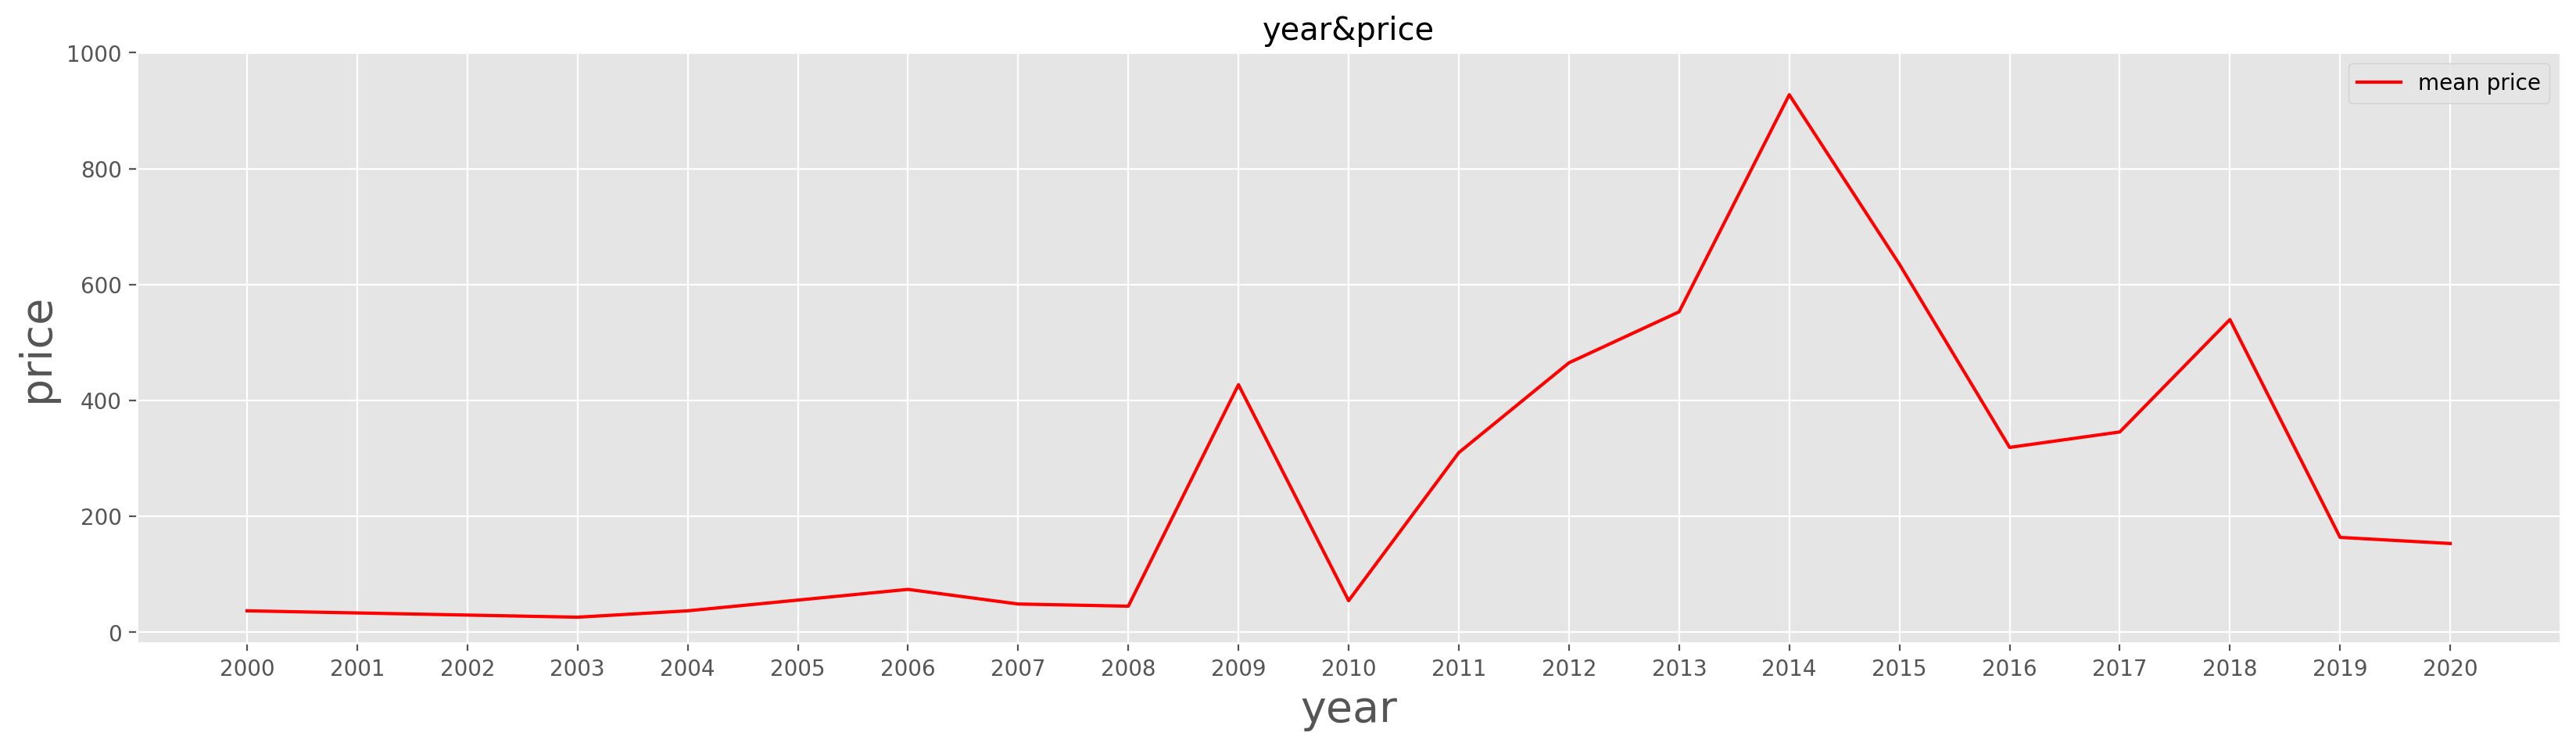

In [8]:
x1= data.groupby('Âπ¥')['‰ª∑Ê†º'].mean().to_frame().reset_index().sort_values(by='Âπ¥')#ÊåâÂπ¥ÂàÜÁªÑÔºåÊ±ÇÂπ≥Âùá‰ª∑Ê†º

plt.figure(figsize=(20, 5),dpi = 200)
plt.plot(x1['Âπ¥'],x1['‰ª∑Ê†º'], c='r',label='mean price')
plt.xlabel('year',fontsize=20)
plt.ylabel('price',fontsize=20)
plt.legend()
plt.title('year&price')
plt.xticks(range(2000,2021))
plt.yticks(range(0,1200,200))
plt.show()

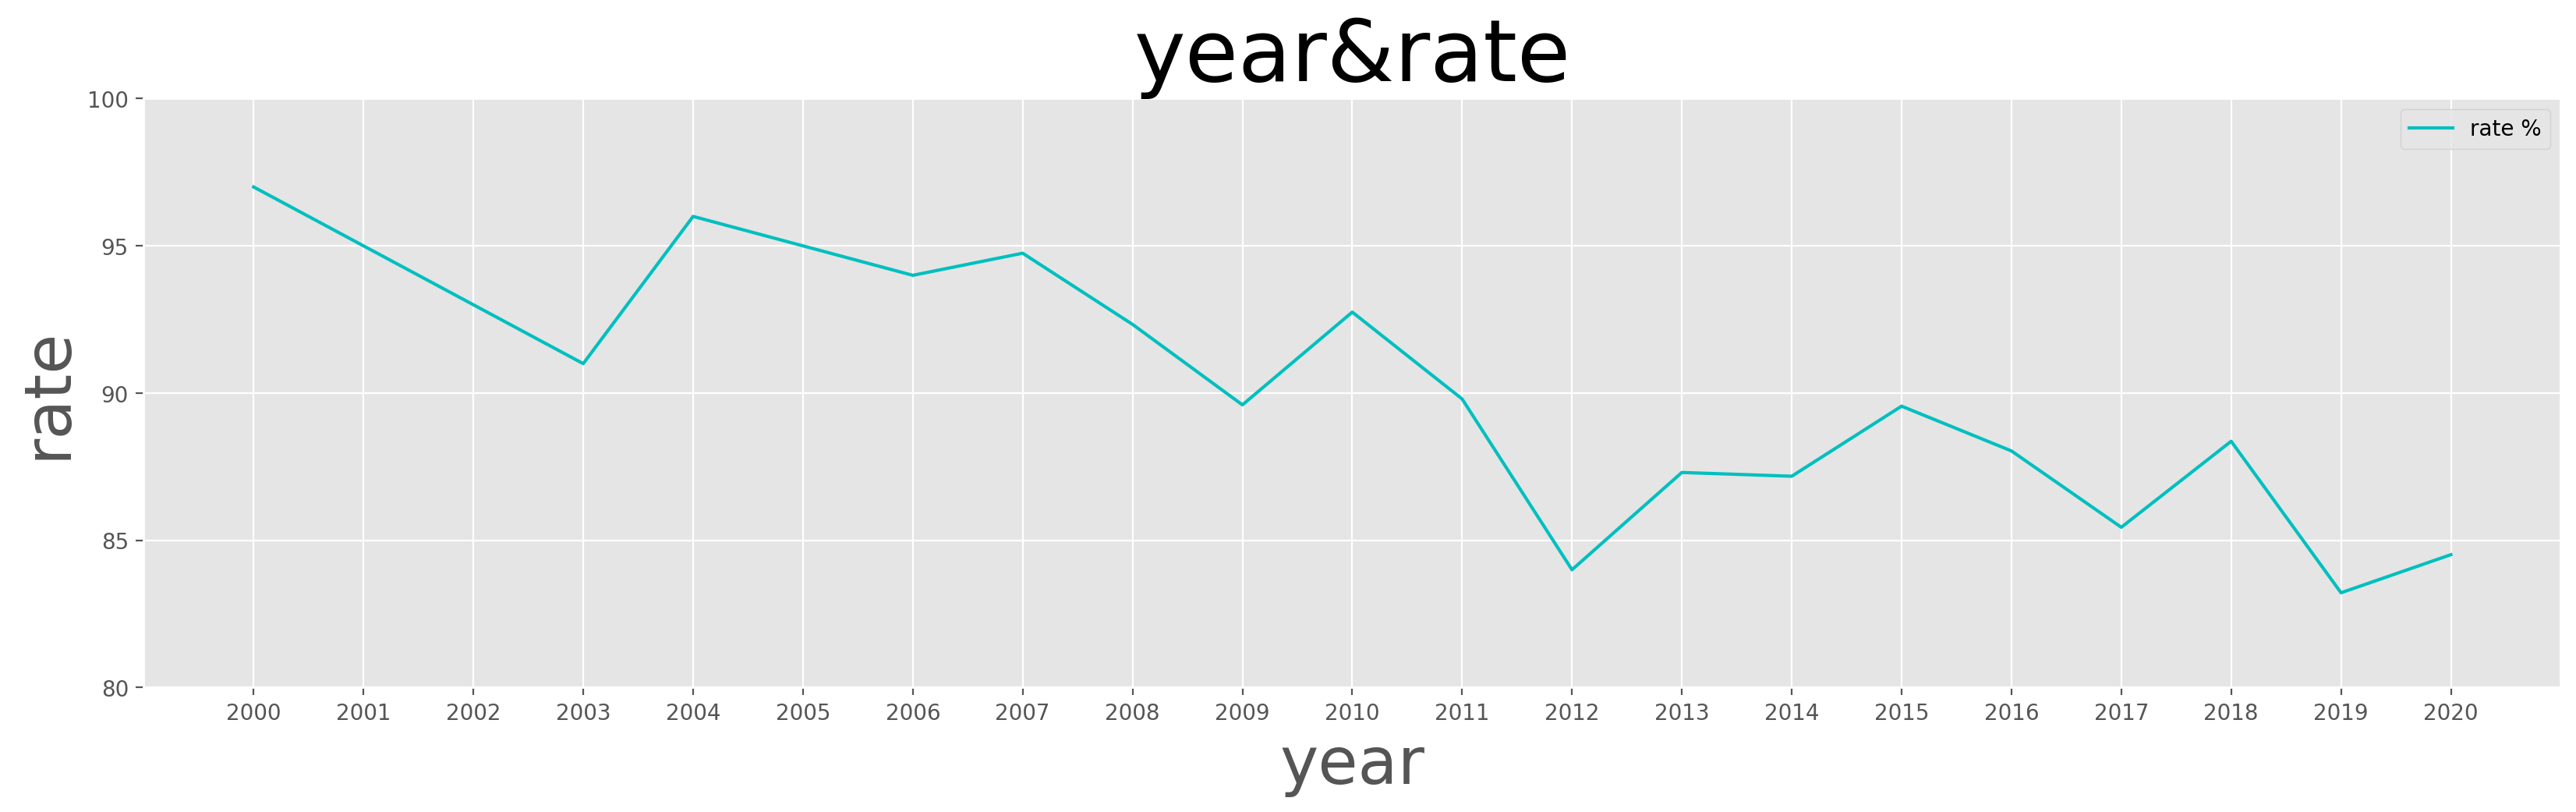

In [9]:
x2 = data.groupby('Âπ¥')['ËøëÊúüÂ•ΩËØÑÁéá'].mean().to_frame().reset_index().sort_values(by='Âπ¥')
plt.figure(figsize=(20, 5),dpi = 200)
plt.plot(x2['Âπ¥'],x2['ËøëÊúüÂ•ΩËØÑÁéá'], c='c',label='rate %')
plt.xlabel('year',fontsize=30)
plt.ylabel('rate',fontsize=30)
plt.legend()
plt.title('year&rate',fontsize=40)
plt.xticks(range(2000,2021))
plt.yticks(range(80,105,5))
plt.show()

In [10]:
list1 = []
list1 = data['Ê†áÁ≠æ'].to_list()

list1 = '\n'.join(list1)
list1 =list1.split('\n')#ÊääÊâÄÊúâÊ†áÁ≠æÂä†ÂÖ•list1
frequency = {}
frequency1 = {}
for word in list1:
    if word not in frequency:
        frequency[word] = 1
    else:
        frequency[word] += 1
frequency = sorted(frequency.items(),key = lambda x :x[1], reverse=True)#Ê†πÊçÆËØçÈ¢ëÈôçÂ∫èÂÅöÊéíÂàóËæìÂá∫‰∏Ä‰∏™ÂÖÉÁªÑ
for i in frequency:
    frequency1[str(i[0])[0:2]+'\n'+str(i[0])[2:4]+'\n'+str(i[0])[4:6]+'\n'+str(i[0])[6:8]]=i[1]#ÂÖÉÁªÑËΩ¨‰∏∫Â≠óÂÖ∏ÔºåÂÜçËÆ©Ê†áÁ≠æÊØèÈöî2‰∏™Â≠óÂä†\n,ÂêéÈù¢Êü±Áä∂Âõæ‰ºöÁî®Âà∞
dffre = data.copy()
for i in  list(frequency)[0:8]:#Ê£ÄÈ™å10‰∏™tagË¶ÜÁõñÁéá
    dffre = dffre[dffre['Ê†áÁ≠æ'].str.contains(i[0])== False]

print(len(dffre))

2


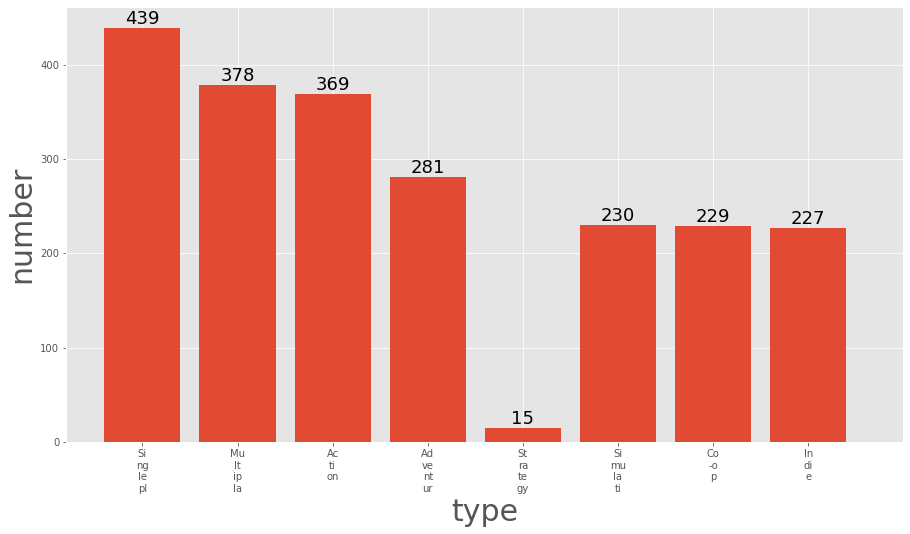

In [17]:
Y = list(frequency1.keys())[0:8]#ÂèñÂâç10‰∏™Ê†áÁ≠æ
X = list(frequency1.values())[0:8]
plt.figure( figsize=(15, 8),)

plt.bar(Y,X)

plt.xlabel('type',fontsize=30)
plt.ylabel('number',fontsize=30)
plt.xlim(-.8, 8)
for a,b in zip(Y,X):
    plt.text(a, b,int(b), ha='center', va= 'bottom',fontsize=18)
plt.show()

In [12]:
#Â•ΩËØÑ‰∏éÈîÄÂîÆÈ¢ùÊòØÂê¶Áõ∏ÂÖ≥Ôºü Âè´Â•ΩÊòØÂê¶Â∞±ÂçñÂ∫ßÔºü
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from regressors import stats
#Ë∏¢Èô§ÂÖçË¥πÊ∏∏ÊàèÔºåÊé¢Á©∂‰ªòË¥πÊ∏∏ÊàèÁöÑÈîÄÂîÆÈ¢ùÊòØÂê¶‰∏éÂ•ΩËØÑÁéáÁõ∏ÂÖ≥
data3 = data[data.‰ª∑Ê†º !=0] 
rate1 = data3['ËøëÊúüÂ•ΩËØÑÁéá']
rate =np.array(rate1).reshape(-1,1)
sales1 = data3['ÈîÄÂîÆÈ¢ù']
sales = np.array(sales1).reshape(-1,1)
regr = linear_model.LinearRegression()
regr.fit(rate,sales)
sales_pred = regr.predict(rate)
print('R squared: %.9f' % r2_score(sales1, sales_pred))
#Â•ΩËØÑ‰∏éÈîÄÂîÆÈ¢ù‰∏çÁõ∏ÂÖ≥

R squared: 0.000648557


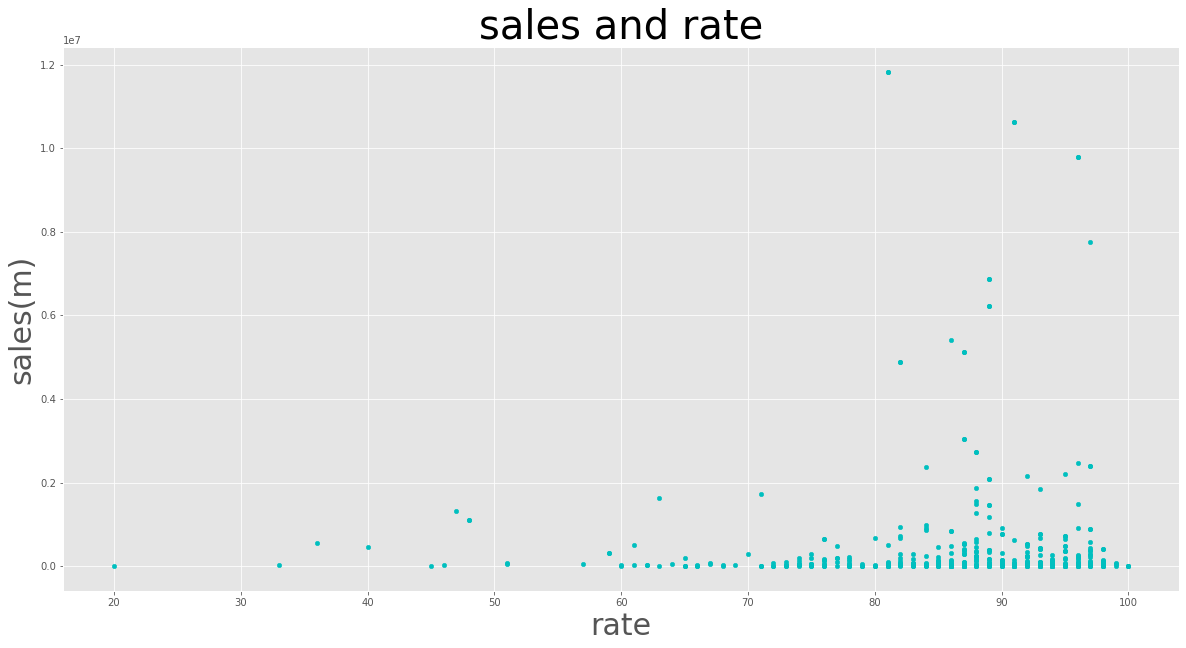

In [19]:
Y = data3['ÈîÄÂîÆÈ¢ù'] 
X = data3['ËøëÊúüÂ•ΩËØÑÁéá']
plt.style.use('ggplot')
plt.figure(figsize=(20, 10))
plt.scatter(X,Y,s=20,c='c')
plt.xlabel('rate',fontsize=30)
plt.ylabel('sales(m)',fontsize=30)
plt.title('sales and rate',fontsize=40)
plt.show()

## 4 ÊñáÊú¨ÂàÜÊûê

In [14]:
import numpy as np
from wordcloud import WordCloud,STOPWORDS
import jieba
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
%pylab inline

ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
#ËØªtxt
stopwords = set(STOPWORDS)
stopwords = [line.strip() for line in open('ÂÅúÁî®ËØçË°®.txt', encoding='UTF-8').readlines()]
# stopwords.add('Ê∏∏Êàè')

def creat_wordcloud(name):
    image = Image.open('7.png')
    mask = np.array(image)
    # mask = np.array(Image.open("steam2.jpg"))
    filename = name
    with open(filename,encoding= 'utf-8') as f: #encoding = 'utf-8'
        mytext = f.read()
    mytext = ' '.join(jieba.cut(mytext))
    word_cloud_4 = WordCloud(background_color= 'white',
                             font_path="STXINGKA.TTF", 
                             max_font_size=200,
                             stopwords = stopwords,
                             mask=mask,
                             scale = 32
                            ).generate(mytext)
    plt.imshow(word_cloud_4, interpolation= 'bilinear')
    plt.axis('off') 
    plt.show()

In [ ]:
#ËØªÂèñexcel
pds = pd.read_excel('plot_data.xlsx')
pds['Chinese Name of the Company'].to_csv('name_2.txt',header=None, sep = ' ', index = False)
creat_wordcloud('name_2.txt')